In [6]:
import sys
import os
sys.path.append(os.path.abspath('../../'))

from evaluation import *
from data_loader import *
import random
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../../../../storage_1/metrics/Exp_0/train/emissions_report.csv")
df.head()

,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue,aggregate_step
0,2024-10-30T14:34:48,codecarbon,ccbd37d9-56f8-4728-9247-1e5f2f90046c,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,11.322457,0.000060,0.000005,140.0,339.949096,0.414621,...,AMD Ryzen Threadripper PRO 3975WX 32-Cores,2,2 x NVIDIA GeForce RTX 3090,-81.2602,42.9979,125.690239,process,N,1.0,0
1,2024-10-30T14:35:03,codecarbon,5cdd87ce-68e2-472f-bcfa-3fe30ef793bc,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,11.145761,0.000059,0.000005,140.0,340.082521,0.415325,...,AMD Ryzen Threadripper PRO 3975WX 32-Cores,2,2 x NVIDIA GeForce RTX 3090,-81.2602,42.9979,125.690239,process,N,1.0,1
2,2024-10-30T14:35:18,codecarbon,e2256ba7-2887-4104-91bd-9e690df05a52,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,10.885474,0.000057,0.000005,140.0,339.197576,0.414594,...,AMD Ryzen Threadripper PRO 3975WX 32-Cores,2,2 x NVIDIA GeForce RTX 3090,-81.2602,42.9979,125.690239,process,N,1.0,2
3,2024-10-30T14:35:34,codecarbon,65c507b4-a1d1-4323-a470-8e26a88385c8,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,10.971485,0.000058,0.000005,140.0,338.265202,0.414705,...,AMD Ryzen Threadripper PRO 3975WX 32-Cores,2,2 x NVIDIA GeForce RTX 3090,-81.2602,42.9979,125.690239,process,N,1.0,3
4,2024-10-30T14:35:49,codecarbon,3ea98c67-4b8b-485e-bd76-78c12f3ccbbf,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,11.007004,0.000058,0.000005,140.0,339.476348,0.414762,...,AMD Ryzen Threadripper PRO 3975WX 32-Cores,2,2 x NVIDIA GeForce RTX 3090,-81.2602,42.9979,125.690239,process,N,1.0,4


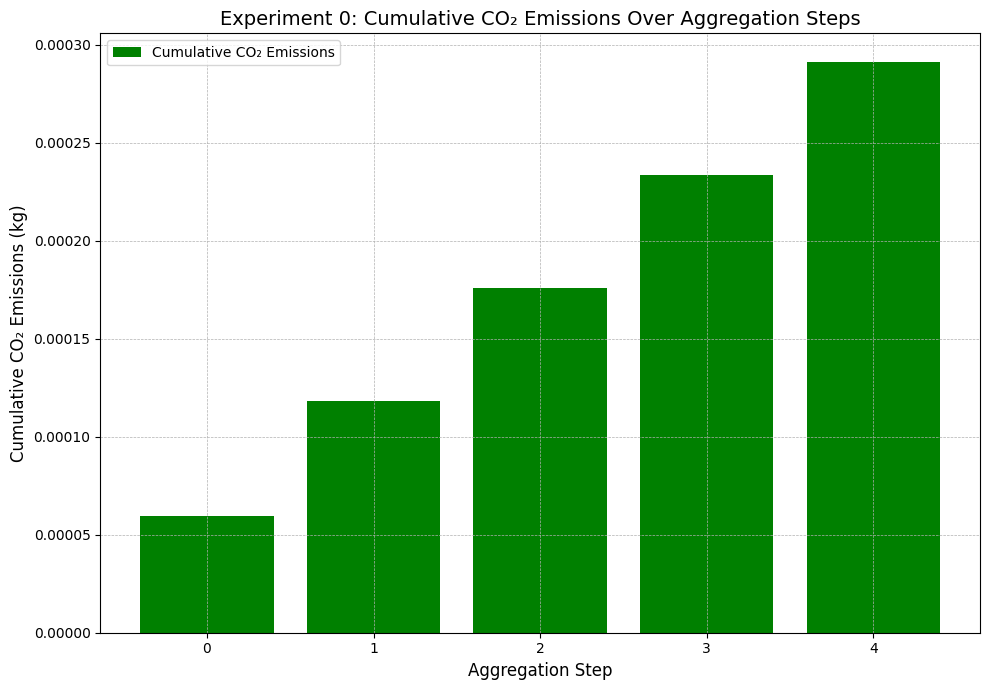

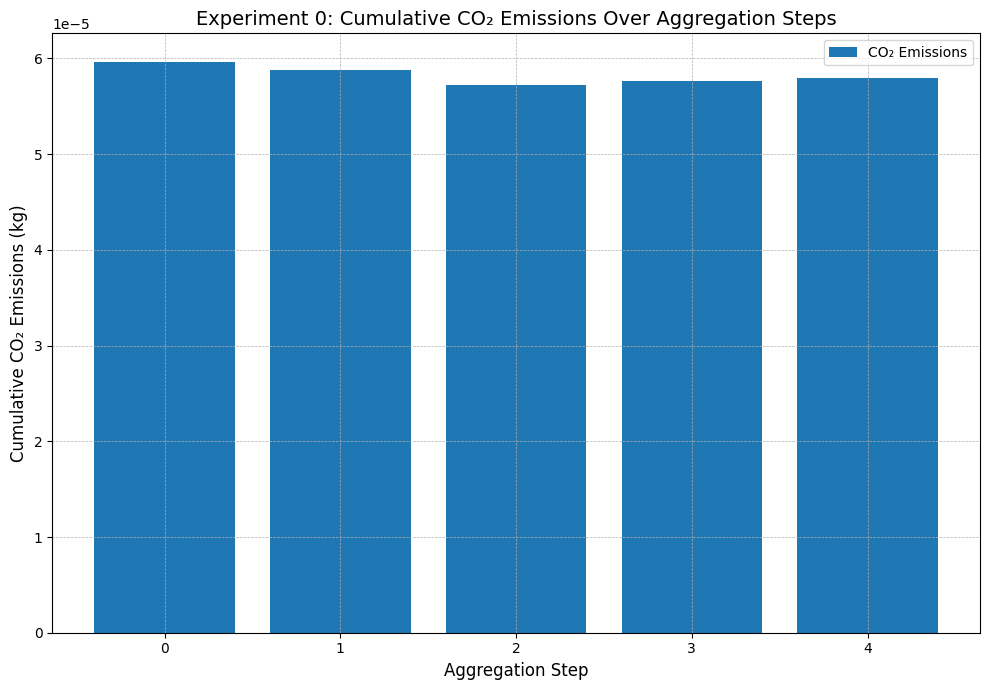

In [12]:
# List of experiment numbers
experiments = [0]

for exp_num in experiments:
    # Construct the base directory path for the current experiment
    d_base = f"../../../../../storage_1/metrics/Exp_{exp_num}"
    
    # Path to the emissions report CSV file
    base_path = f"{d_base}/train/emissions_report.csv"
    
    # Read the CSV file into a pandas DataFrame
    try:
        df = pd.read_csv(base_path)
    except FileNotFoundError:
        print(f"File not found: {base_path}")
        continue  # Skip to the next experiment if file is not found
    
    # Calculate the cumulative sum of emissions
    df['cumulative_emissions'] = df['emissions'].cumsum()
    
    # Plotting the cumulative emissions
    plt.figure(figsize=(10, 7))
    plt.bar(df['aggregate_step'], df['cumulative_emissions'], label='Cumulative CO₂ Emissions', color='green', linewidth=2)
    
    # Adding labels and title
    plt.xlabel('Aggregation Step', fontsize=12)
    plt.ylabel('Cumulative CO₂ Emissions (kg)', fontsize=12)
    plt.title(f'Experiment {exp_num}: Cumulative CO₂ Emissions Over Aggregation Steps', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plotting the emissions
    plt.figure(figsize=(10, 7))
    plt.bar(df['aggregate_step'], df['emissions'], label='CO₂ Emissions', linewidth=2)
    
    # Adding labels and title
    plt.xlabel('Aggregation Step', fontsize=12)
    plt.ylabel('Cumulative CO₂ Emissions (kg)', fontsize=12)
    plt.title(f'Experiment {exp_num}: Cumulative CO₂ Emissions Over Aggregation Steps', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()